<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/22_rnn_tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#순환신경망 주식예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [1]:
!pip install yfinance

In [3]:
import yfinance as yf

tsla=yf.Ticker('TSLA')
df=tsla.history(period='max')
df.shape

(3653, 7)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2010-06-29 00:00:00-04:00 to 2025-01-02 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3653 non-null   float64
 1   High          3653 non-null   float64
 2   Low           3653 non-null   float64
 3   Close         3653 non-null   float64
 4   Volume        3653 non-null   int64  
 5   Dividends     3653 non-null   float64
 6   Stock Splits  3653 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 228.3 KB


In [6]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


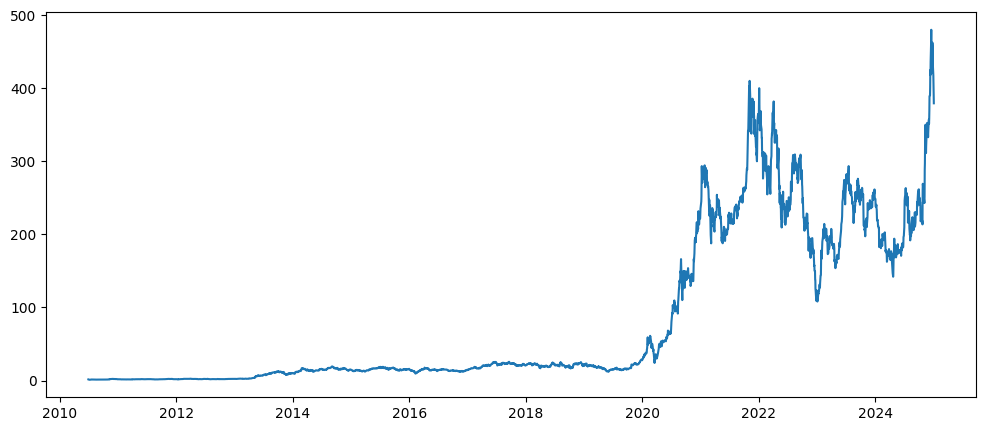

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df['Close'])
plt.show()

# 피쳐 추가

In [10]:
df['ma3']=np.around(df['Close'].rolling(window=3).mean(),0)

In [11]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma3
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,2.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.0


In [12]:
df['ma5']=np.around(df['Close'].rolling(window=5).mean(),0)
df['ma20']=np.around(df['Close'].rolling(window=20).mean(),0)

In [13]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma3,ma5,ma20
Date,,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,NaN,NaN,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,NaN,NaN,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,2.0,NaN,NaN
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.0,NaN,NaN
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.0,1.0,NaN


In [14]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
ma3,2
ma5,4
ma20,19


#결측치 삭제

In [15]:
df=df.dropna()
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
ma3,0
ma5,0
ma20,0


#데이터 분리

In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ma3', 'ma5', 'ma20'],
      dtype='object')

In [26]:
x=df.drop(['Close', 'Volume', 'Dividends', 'Stock Splits'],axis=1)

In [27]:
y=df['Close']

In [28]:
y

,Close
Date,
2010-07-27 00:00:00-04:00,1.370000
2010-07-28 00:00:00-04:00,1.381333
2010-07-29 00:00:00-04:00,1.356667
2010-07-30 00:00:00-04:00,1.329333
2010-08-02 00:00:00-04:00,1.394667
...,...
2024-12-26 00:00:00-05:00,454.130005
2024-12-27 00:00:00-05:00,431.660004
2024-12-30 00:00:00-05:00,417.410004


In [29]:
x

,Open,High,Low,ma3,ma5,ma20
Date,,,,,,
2010-07-27 00:00:00-04:00,1.394000,1.412000,1.350667,1.0,1.0,1.0
2010-07-28 00:00:00-04:00,1.370000,1.393333,1.367333,1.0,1.0,1.0
2010-07-29 00:00:00-04:00,1.384667,1.392000,1.333333,1.0,1.0,1.0
2010-07-30 00:00:00-04:00,1.346667,1.362667,1.303333,1.0,1.0,1.0
2010-08-02 00:00:00-04:00,1.366667,1.398000,1.355333,1.0,1.0,1.0
...,...,...,...,...,...,...
2024-12-26 00:00:00-05:00,465.160004,465.329987,451.019989,449.0,441.0,408.0
2024-12-27 00:00:00-05:00,449.519989,450.000000,426.500000,449.0,440.0,413.0
2024-12-30 00:00:00-05:00,419.399994,427.000000,415.750000,434.0,439.0,417.0


In [30]:
def make_sequence_dataset(x,y,window_size=20):#시퀀스 데이터 만들기
  feature_list=[]
  label_list=[]
  for i in range(len(x)-window_size):
    new_x=x[i:i+window_size]#윈도우 사이즈만큼 받음
    new_y=y[i+window_size]#윈도우 마지막 번호의 결과값으로 만듦
    feature_list.append(new_x)
    label_list.append(new_y)
  return np.array(feature_list),np.array(label_list)

In [31]:
x_w,y_w=make_sequence_dataset(x,y,20)
x_w.shape,y_w.shape


<ipython-input-30-ed21b70ff24e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_y=y[i+window_size]#윈도우 마지막 번호의 결과값으로 만듦


((3614, 20, 6), (3614,))

#분할

In [16]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_w,y_w,test_size=0.2,shuffle=False)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2891, 20, 6), (723, 20, 6), (2891,), (723,))

#스케일링, 패스

#모델 만들기

In [34]:
from keras import layers

model=keras.Sequential()
model.add(layers.Input(shape=(20,6)))
model.add(layers.LSTM(units=48,activation='relu'))
model.add(layers.Dense(units=1))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 48)                  │          10,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,609 (41.44 KB)

 Trainable params: 10,609 (41.44 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae'],
)

In [36]:
epochs=100
batch_size=16

history=model.fit(x_train,
                  y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_split=0.2,
                  )

Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 103.4402 - mae: 5.9411 - val_loss: 1623.5615 - val_mae: 25.0404
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7089 - mae: 0.5848 - val_loss: 1172.4830 - val_mae: 20.0184
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5482 - mae: 0.5212 - val_loss: 754.9334 - val_mae: 16.3209
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5283 - mae: 0.5015 - val_loss: 597.8818 - val_mae: 15.6522
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4672 - mae: 0.4698 - val_loss: 722.4404 - val_mae: 16.4394
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3937 - mae: 0.4330 - val_loss: 2670.4702 - val_mae: 28.2682
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3405 - mae: 0.3934 - val_loss: 717.7509 - val_mae: 16.8269
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2868 - mae: 0.3545 - val_loss: 18599.1973 - val_mae: 96.9483
Epoch 9/10

In [43]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['mae'], label='train_mae')
    plt.plot(hist['epoch'], hist['val_mae'], label='val_mae')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


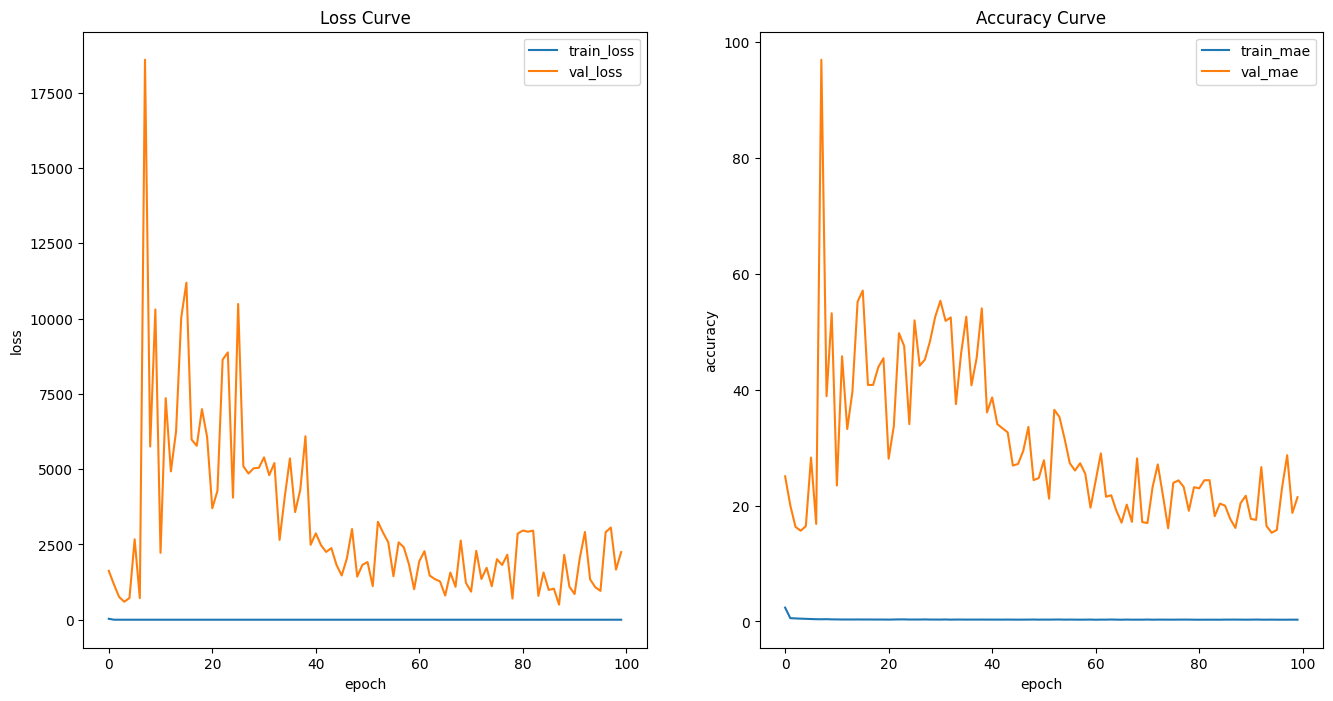

In [44]:
plot_history(history)

#테스트

In [45]:
y_pred=model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


In [48]:
print_metrics(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) #최댓값만 출력

AxisError: axis 1 is out of bounds for array of dimension 1

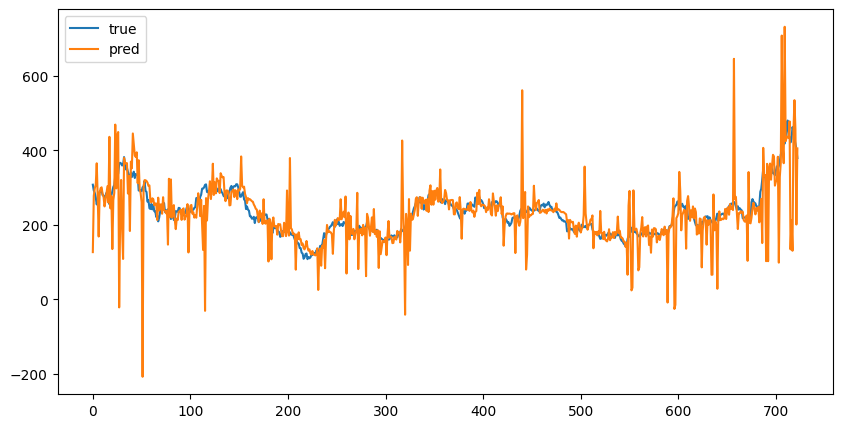

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()